APLICACIÓN DEL ALGORITMO NAIVE BAYES PARA PREDECIR EL DESEMPEÑO ACADÉMICO DE LOS ALUMNOS DE LA FACULTAD DE CIENCIAS SOCIALES EN EL CURSO DE DIDÁCTICA DE LA GEOGRAFÍA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configurar la semilla aleatoria para reproducibilidad
np.random.seed(42)

# Crear datos simulados para 800 alumnos
num_students = 800
items = 5
data = np.random.randint(0, 2, size=(num_students, items)) * 4  # 0 o 4 puntos por pregunta

# Convertir a DataFrame
df = pd.DataFrame(data, columns=[f'item{i+1}' for i in range(items)])

# Calcular el puntaje total
df['score'] = df.sum(axis=1)

# Convertir el puntaje total en etiquetas de aprobado/desaprobado
df['label'] = np.where(df['score'] >= 12, 'aprobado', 'desaprobado')

# Definir X (características) e Y (etiqueta)
X = df[['item1', 'item2', 'item3', 'item4', 'item5']]
y = df['label']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Naive Bayes
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Mostrar las primeras 10 predicciones
for i, (pred, actual) in enumerate(zip(y_pred[:10], y_test[:10])):
    print(f"Alumno {i+1}: Predicción = {pred}, Realidad = {actual}")


Precisión del modelo: 100.00%
Alumno 1: Predicción = desaprobado, Realidad = desaprobado
Alumno 2: Predicción = aprobado, Realidad = aprobado
Alumno 3: Predicción = desaprobado, Realidad = desaprobado
Alumno 4: Predicción = desaprobado, Realidad = desaprobado
Alumno 5: Predicción = desaprobado, Realidad = desaprobado
Alumno 6: Predicción = aprobado, Realidad = aprobado
Alumno 7: Predicción = desaprobado, Realidad = desaprobado
Alumno 8: Predicción = desaprobado, Realidad = desaprobado
Alumno 9: Predicción = aprobado, Realidad = aprobado
Alumno 10: Predicción = aprobado, Realidad = aprobado


Precisión del modelo: 100.00%


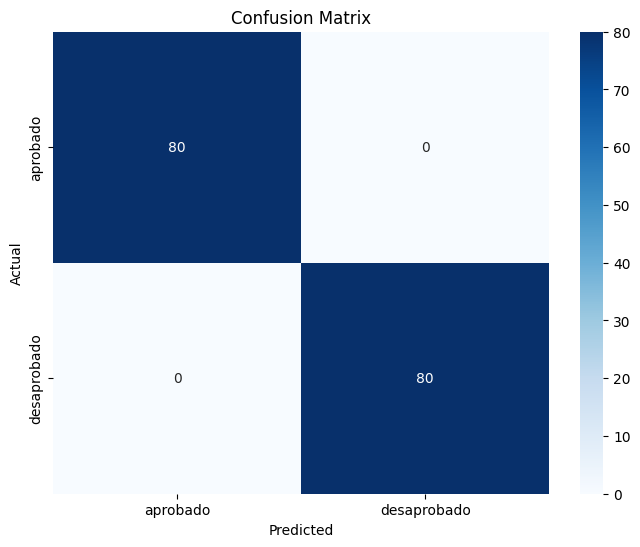

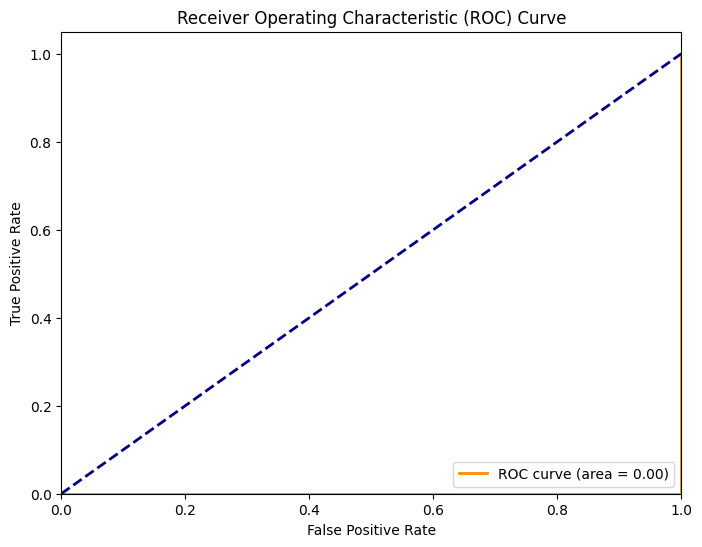

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Configurar la semilla aleatoria para reproducibilidad
np.random.seed(42)

# Crear datos simulados para 800 alumnos
num_students = 800
items = 5
data = np.random.randint(0, 2, size=(num_students, items)) * 4  # 0 o 4 puntos por pregunta

# Convertir a DataFrame
df = pd.DataFrame(data, columns=[f'item{i+1}' for i in range(items)])

# Calcular el puntaje total
df['score'] = df.sum(axis=1)

# Convertir el puntaje total en etiquetas de aprobado/desaprobado
df['label'] = np.where(df['score'] >= 12, 'aprobado', 'desaprobado')

# Definir X (características) e Y (etiqueta)
X = df[['item1', 'item2', 'item3', 'item4', 'item5']]
y = df['label']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Naive Bayes
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva (aprobado)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred, labels=['aprobado', 'desaprobado'])

# Dibujar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['aprobado', 'desaprobado'], yticklabels=['aprobado', 'desaprobado'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test.map({'aprobado': 1, 'desaprobado': 0}), y_pred_prob)
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

df = pd.read_csv('estudiantesGeografia.csv')

# Convertir a DataFrame
df = pd.DataFrame(data, columns=[f'item{i+1}' for i in range(items)])

# Calcular el puntaje total
df['score'] = df.sum(axis=1)

# Convertir el puntaje total en etiquetas de aprobado/desaprobado
df['label'] = np.where(df['score'] >= 12, 'aprobado', 'desaprobado')

# Definir X (características) e Y (etiqueta)
X = df[['item1', 'item2', 'item3', 'item4', 'item5']]
y = df['label']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Naive Bayes
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva (aprobado)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred, labels=['aprobado', 'desaprobado'])

# Dibujar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['aprobado', 'desaprobado'], yticklabels=['aprobado', 'desaprobado'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test.map({'aprobado': 1, 'desaprobado': 0}), y_pred_prob)
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
